In [1]:
# 리그 / 팀별로 특성이 차이가 분명히 있었음!!! (앞에서 증명됨)
# 변수를 축소하여 모델링을 해보자

# 0. 리그 / 팀별 특성 존재 유무 탐색 ==> 증명됨!
# 1. 주성분분석 ==> 변수 축소 (여기까지는 가능할 것으로 보임)
# 2. Artificial Neural Network로 모델링 진행 (성능개선 필요)

In [2]:
import numpy as np
from sklearn.decomposition import PCA

In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [4]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, n_components=1, whiten=False)

In [5]:
print(pca.explained_variance_ratio_)

[ 0.99244289]


In [6]:
pca.components_

array([[ 0.83849224,  0.54491354]])

In [7]:
pca.transform(X)

array([[-1.38340578],
       [-2.22189802],
       [-3.6053038 ],
       [ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ]])

In [8]:
w, V = np.linalg.eig(pca.get_covariance())

In [9]:
w

array([ 6.61628593,  0.05038073])

In [10]:
V

array([[ 0.83849224, -0.54491354],
       [ 0.54491354,  0.83849224]])

In [11]:
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

In [12]:
import pandas as pd

In [13]:
merged_player = pd.read_csv("./merged_player.csv")

In [14]:
merged_player = merged_player.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [15]:
merged_player.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'flag', 'fouled', 'fouls', 'full_time', 'goals', 'half_time',
       'inter', 'keyp', 'league', 'longb', 'mins', 'motm', 'name', 'off',
       'offsides', 'owng', 'player_number', 'position', 'ps_x', 'ps_y',
       'rating', 'red', 'spg', 'tackles', 'tall', 'team_name', 'thrb',
       'unstch', 'weight', 'yel'],
      dtype='object')

In [16]:
merged_player0 = merged_player.drop(['flag', 'player_number', 'team_name', 'name'], axis=1)

In [17]:
merged_player0 = merged_player0.drop(['rating', 'full_time', 'motm', 'half_time'], axis=1)

In [18]:
merged_player0["position"] = merged_player0["position"].apply(lambda x: x.strip())

forward_pos = []
mid_pos = []
defense_pos = []

for position in merged_player0["position"].unique():
    
    
    if position.find("F") == 0:
        forward_pos.append(position)
        
    if position.find("A") == 0:
        forward_pos.append(position)
        
    if position.find("M") == 0:
        mid_pos.append(position)
        
    if position.find("D") == 0:
        defense_pos.append(position)
        
forward_df = pd.DataFrame(columns=merged_player0.columns)

for position in forward_pos:
    f_df = merged_player[merged_player0["position"] == position]
    forward_df = pd.concat([forward_df, f_df])
    
mid_df = pd.DataFrame(columns=merged_player0.columns)

for position in mid_pos:
    m_df = merged_player[merged_player0["position"] == position]
    mid_df = pd.concat([mid_df, m_df])
    
defense_df = pd.DataFrame(columns=merged_player0.columns)

for position in defense_pos:
    d_df = merged_player[merged_player0["position"] == position]
    defense_df = pd.concat([defense_df, d_df])

In [19]:
forward_df.to_csv("./forward_df.csv")

In [20]:
forward_df0 = forward_df.drop(['flag', 'full_time', 'half_time', 'mins', 'motm', 'name', 'player_number', 'position', 'ps_y', 'rating', 'team_name'], axis=1)

In [21]:
forward_df0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'off', 'offsides', 'owng', 'ps_x', 'red', 'spg', 'tackles', 'tall',
       'thrb', 'unstch', 'weight', 'yel'],
      dtype='object')

In [22]:
forward_df0 = forward_df0.drop(['league'], axis=1)

In [23]:
forward_df0 = forward_df0.drop(['off', 'offsides'], axis=1)

In [24]:
forward_df0 = forward_df0.fillna(0)

In [25]:
X.dtype

dtype('int64')

In [26]:
X = forward_df0.get_values()

In [27]:
np.shape(X)

(920, 25)

In [28]:
pca = PCA(n_components=6)

In [29]:
pca.fit(X)

PCA(copy=True, n_components=6, whiten=False)

In [30]:
print(pca.explained_variance_ratio_)

[ 0.63893309  0.26388151  0.03779409  0.02270986  0.01542785  0.0115791 ]


In [31]:
pca.n_components_

6

In [32]:
np.shape(pca.transform(X))

(920, 6)

In [33]:
# 성분수에 따른 성능평가 (모사정도의 평가)

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [35]:
pca = PCA().fit(X)

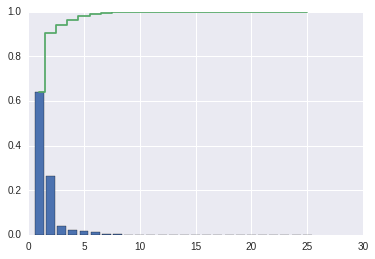

In [36]:
var = pca.explained_variance_
cmap = sns.color_palette()
# plt.figure(figsize=(150, 100))
plt.bar(np.arange(1, len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1, len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])

plt.show()

In [37]:
def labeling_league(x):
    if x == "Bundesliga":
        x = 0
        
    if x == "Ligue1":
        x = 1
        
    if x == "SerieA":
        x = 2
        
    if x == "PremierLeague":
        x = 3
        
    if x == "LaLiga":
        x = 4
        
    if x == "Eredivisie":
        x = 5
        
    return x

In [38]:
forward_df['labeled_league'] = forward_df['league'].apply(lambda x: labeling_league(x))

In [39]:
modeling_data = merged_player[merged_player['rating'] >= 7]

In [40]:
modeling_data0 = modeling_data.drop(['flag', 'full_time', 'half_time', 'player_number', 'ps_y', 'rating', 'team_name'], axis=1)

In [41]:
modeling_data0['labeled_league'] = modeling_data0['league'].apply(lambda x: labeling_league(x))

In [42]:
modeling_data0 = modeling_data0.drop(['position', 'league'], axis=1)

In [43]:
modeling_data0.columns[:-1]

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'longb', 'mins',
       'motm', 'name', 'off', 'offsides', 'owng', 'ps_x', 'red', 'spg',
       'tackles', 'tall', 'thrb', 'unstch', 'weight', 'yel'],
      dtype='object')

In [44]:
X = modeling_data0[:-1].get_values()

In [45]:
y = modeling_data0["labeled_league"].get_values()

## LCY

#### 리그 추천

In [46]:
forward_df0 = forward_df0.drop(['team_name'], axis=1)

ValueError: labels ['team_name'] not contained in axis

In [ ]:
forward_df0 = forward_df0.drop(['labeled_league'], axis=1)

In [ ]:
forward_df0 = forward_df0.fillna(0)

In [ ]:
# 로지스틱회귀분석 모델링구축

from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline

X = forward_df0.get_values()
y = forward_df['labeled_league'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

pca = decomposition.PCA(n_components=7)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X, y)

In [ ]:
model2.predict(X_LCY)

In [ ]:
model2.predict_proba(X_LCY)

In [ ]:
# 프리미어리그 평균특성
pca.transform(premier_for_df1.mean())

In [ ]:
# 이청용 특성 그래프
pca.transform(X_LCY)

#### 팀 추천

In [47]:
len(forward_df0.columns)

25

In [48]:
merged_player0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'mins', 'off', 'offsides', 'owng', 'position', 'ps_x', 'ps_y', 'red',
       'spg', 'tackles', 'tall', 'thrb', 'unstch', 'weight', 'yel'],
      dtype='object')

In [49]:
merged_player0 = merged_player.drop(['flag', 'full_time', 'half_time', 'player_number', 'ps_y', 'rating', 'team_name'], axis=1)

In [50]:
LCY = merged_player0[merged_player0['name'] == "Lee Chung-yong"]

In [51]:
LCY.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'mins', 'motm', 'name', 'off', 'offsides', 'owng', 'position', 'ps_x',
       'red', 'spg', 'tackles', 'tall', 'thrb', 'unstch', 'weight', 'yel'],
      dtype='object')

In [52]:
LCY.to_csv("./data/LCY.csv")

In [ ]:
LCY0 = LCY.drop(['position', 'motm', 'mins', 'name', 'league'], axis=1)

In [ ]:
LCY0 = LCY0.drop(['off', 'offsides'], axis=1)

In [ ]:
# 이청용 선수
# 리그 추천결과 / 팀 추천결과
# Plot 6개의 변수 비교
# 인사이트 도출

In [ ]:
X_LCY = LCY0.get_values()

In [ ]:
modeling_data0.columns

In [ ]:
LCY0.columns, forward_df0.columns

In [ ]:
model1.predict(X_LCY) 

In [ ]:
model1.predict_proba(X_LCY) # 프리미어리그 / 라리가 / 리그1 / 에레디비지 / 분데스리가 / 세리에 순

### 그리즈만

In [ ]:
pca.transform(X_Griezmann0.get_values())

In [ ]:
model2.predict(X_Griezmann0.get_values())

In [ ]:
model2.predict_proba(X_Griezmann0.get_values())

In [ ]:
# 팀 추천 모델

In [ ]:
forward_df0 = forward_df.drop(['flag', 'full_time', 'half_time', 'league', 'mins', 'motm', 'name', 'off', 'offsides', 'player_number', 'position', 'ps_y', 'rating'], axis=1)

In [ ]:
premier_for_df = forward_df0[forward_df0['labeled_league'] == 3]

In [ ]:
# premier_for_df['team_name'].

In [ ]:
def labeling_team(x):
    if x == 'Everton':
        x = 0
    
    if x == 'Southampton':
        x = 1
        
    if x == 'Liverpool':
        x = 2
        
    if x == 'Arsenal':
        x = 3   
    
    if x == 'Norwich':
        x = 4
        
    if x == 'Stoke':
        x = 5
        
    if x == 'West Bromwich Albion':
        x = 6
        
    if x == 'Leicester':
        x = 7
        
    if x == 'Bournemouth':
        x = 8
        
    if x == 'Tottenham':
        x = 9
        
    if x == 'Watford':
        x = 10
        
    if x == 'Crystal Palace':
        x = 11
        
    if x == 'Sunderland':
        x = 12
        
    if x == 'Manchester City':
        x = 13
        
    if x == 'West Ham':
        x = 14
        
    if x == 'Manchester United':
        x = 15
        
    if x == 'Newcastle United':
        x = 16   
    
    if x == 'Aston Villa':
        x = 17
        
    if x == 'Swansea':
        x = 18
        
    return x

In [ ]:
premier_for_df['labeled_team'] = premier_for_df['team_name'].apply(lambda x: labeling_team(x))

In [ ]:
premier_for_df0 = premier_for_df.drop(['team_name'], axis=1)

In [ ]:
premier_for_df0.columns[:-2]

In [ ]:
premier_for_df.to_csv('./hhhhh.csv')

In [ ]:
np.shape(X)

In [ ]:
np.shape(y)

In [ ]:
y[:-2]

In [ ]:
X

In [ ]:
premier_for_df0.columns

In [ ]:
premier_for_df1 = premier_for_df0.drop(['labeled_league', 'labeled_team'], axis=1)

In [ ]:
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline

X = premier_for_df1.get_values()
y = premier_for_df0['labeled_team'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

pca = decomposition.PCA(n_components=7, whiten=True)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X, y)

In [ ]:
model2.predict(X_LCY)

In [ ]:
model2.predict_proba(X_LCY) * 250 # 본머스 / 헐시티 / 웨스트 브롬위치 / 레스터시티 / 미들즈브러 / 크리스탈팰리스

In [ ]:
model2.predict(X_LCY)

In [ ]:
pca.transform(X_LCY)

In [ ]:
pca.transform(premier_for_df1.get_values())[8]

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_

In [ ]:
premier_for_df2 = premier_for_df0.drop(['labeled_league'], axis=1)

In [ ]:
본머스 = premier_for_df2[premier_for_df2['labeled_team'] == 8].mean()

In [ ]:
pca.transform(본머스.get_values()[:-1])

In [ ]:
pca.transform(X_LCY)

In [ ]:
model2.transform(X_LCY)

In [ ]:
model2.predict(X_LCY)

In [ ]:
model2.predict_proba(X_LCY).max()

In [ ]:
# 그리즈만
pca.transform(X_Griezmann0.get_values())

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
model2.predict_proba(X_Griezmann0.get_values())

In [ ]:
model2.predict_proba(X_Griezmann0.get_values()).argsort()

In [ ]:
model2.predict(X_Griezmann0.get_values())

In [ ]:
pca.transform(premier_for_df1)[13]

In [53]:
# 박주호 선수
X_PJH = defense_df[defense_df['name'] == 'Joo-Ho Park']

In [54]:
drop_column_list = ['flag', 'full_time', 'half_time', 'mins', 'motm', 'name', 'player_number', 'ps_y', 'rating']

In [55]:
defense_df0 = defense_df.drop(drop_column_list, axis=1)

In [56]:
X_PJH = X_PJH.drop(drop_column_list, axis=1)

In [59]:
X_PJH.to_csv('./data/PJH.csv')

In [ ]:
defense_df0['labeled_league'] = defense_df0['league'].apply(lambda x: labeling_league(x))

In [ ]:
defense_df0['labeled_league'].unique()

In [ ]:
defense_df0.columns

In [ ]:
defense_df1 = defense_df0.drop(['position', 'league', 'labeled_league', 'team_name'], axis=1)

In [ ]:
defense_df1 = defense_df1.fillna(0)

In [ ]:
X = defense_df1.get_values()
y = defense_df0['labeled_league'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

pca = decomposition.PCA(n_components=7, whiten=True)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X, y)

In [ ]:
# 박주호 리그 추천결과
X_PJH = X_PJH.drop(['team_name', 'position', 'league'], axis=1)

In [ ]:
X_PJH = X_PJH.mean().get_values()

In [ ]:
model1.predict(X_PJH)

In [ ]:
model1.predict_proba(X_PJH) # 리그앙 / 라리가 / 세리에 / 에레디비지 / 프리미어리그 / 분데스리가

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.transform(X_PJH)

In [ ]:
pca.transform(ligue1_def_df0.mean())

In [ ]:
# 박주호 팀 추천결과

ligue1_def_df = defense_df0[defense_df0['labeled_league'] == 1]

In [ ]:
ligue1_def_df['team_name'].unique()

In [ ]:
def labeling_team(x):
    if x == 'Reims':
        x = 0
    
    if x == 'Lille':
        x = 1
        
    if x == 'Toulouse':
        x = 2
        
    if x == 'GFC Ajaccio':
        x = 3   
    
    if x == 'Paris Saint Germain':
        x = 4
        
    if x == 'Saint-Etienne':
        x = 5
        
    if x == 'SC Bastia':
        x = 6
        
    if x == 'Rennes':
        x = 7
        
    if x == 'Guingamp':
        x = 8
        
    if x == 'Angers':
        x = 9
        
    if x == 'Monaco':
        x = 10
        
    if x == 'Lyon':
        x = 11
        
    if x == 'Montpellier':
        x = 12
        
    if x == 'Caen':
        x = 13
        
    if x == 'Nantes':
        x = 14
        
    if x == 'Nice':
        x = 15
        
    if x == 'Lorient':
        x = 16   
    
    if x == 'Marseille':
        x = 17
        
    if x == 'Bordeaux':
        x = 18
        
    return x

In [ ]:
defense_df0.columns

In [ ]:
ligue1_def_df['labeled_team'] = ligue1_def_df['team_name'].apply(lambda x: labeling_team(x))

In [ ]:
ligue1_def_df['labeled_team'].unique()

In [ ]:
ligue1_def_df.columns

In [ ]:
ligue1_def_df0 = ligue1_def_df.drop(['team_name', 'labeled_league', 'labeled_team', 'position', 'league'], axis=1)

In [ ]:
X = ligue1_def_df0.get_values()
y = ligue1_def_df['labeled_team'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

pca = decomposition.PCA(n_components=7, whiten=True)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X, y)

In [ ]:
team_list = ligue1_def_df['team_name'].unique()

In [ ]:
team_list[model2.predict_proba(X_PJH).argsort()]

In [ ]:
model2.predict(X_PJH)

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.transform(X_PJH)

In [ ]:
pca.transform(ligue1_def_df0)[4]

In [ ]:
model2.predict_proba(X_PJH)

In [ ]:
# 앙투앙 그리즈만
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline

X = forward_df1.get_values()
y = forward_df0['labeled_league'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

In [ ]:
forward_df1 = forward_df0.drop(['team_name', 'labeled_league'], axis=1)

In [ ]:
forward_df1.columns

In [ ]:
forward_df1 = forward_df1.fillna(0)

In [ ]:
X_Griezmann = forward_df[forward_df['name'] == 'Antoine Griezmann']

In [ ]:
X_Griezmann0 = X_Griezmann.drop(['flag', 'full_time', 'rating','half_time', 'league', 'mins', 'motm', 'off', 'offsides', 'player_number', 'ps_y', 'team_name', 'labeled_league'], axis=1)

In [ ]:
X_Griezmann0 = X_Griezmann0.drop(['position', 'name'], axis=1)

In [ ]:
model1.predict(X_Griezmann0)

In [ ]:
model1.predict_proba(X_Griezmann0)

In [ ]:
model1.predict_proba(X_Griezmann0).argsort() # 라리가 / 에레디비지 / 프리미어 / 분데스 / 리그앙 / 세리에

In [ ]:
X = premier_for_df1.get_values()
y = premier_for_df0['labeled_team'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

In [ ]:
model1.predict(X_Griezmann0)

In [ ]:
model1.predict_proba(X_Griezmann0)

In [ ]:
premier_for_df['team_name'].unique()[[7, 9, 5, 10, 0, 13, 12, 15]]

In [ ]:
model1.predict_proba(X_Griezmann0).argsort()